In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("./Dataset/BanksDataset/AXISBANK.csv")
data.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.70,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.00,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.00,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.80,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.00,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN
5,2000-01-10,UTIBANK,EQ,24.80,25.05,26.50,25.00,25.0,25.00,25.29,64200,1.623340e+11,NaN,NaN,NaN
6,2000-01-11,UTIBANK,EQ,25.00,24.25,24.80,23.00,23.0,23.20,23.90,91700,2.191725e+11,NaN,NaN,NaN
7,2000-01-12,UTIBANK,EQ,23.20,22.60,24.50,22.60,24.0,24.00,23.97,32500,7.791350e+10,NaN,NaN,NaN
8,2000-01-13,UTIBANK,EQ,24.00,24.50,24.50,23.10,23.8,23.60,23.77,48300,1.147955e+11,NaN,NaN,NaN
9,2000-01-14,UTIBANK,EQ,23.60,24.00,24.20,22.50,23.5,23.25,23.17,30700,7.114250e+10,NaN,NaN,NaN


In [3]:
data = data.drop(["Series","Trades","Deliverable Volume","%Deliverble"], axis= 1)

In [4]:
print(data)
value = data.values 

Date    Symbol  Prev Close   Open    High     Low   Last   Close  \
0     2000-01-03   UTIBANK       24.70   26.7   26.70   26.70   26.7   26.70   
1     2000-01-04   UTIBANK       26.70   27.0   28.70   26.50   27.0   26.85   
2     2000-01-05   UTIBANK       26.85   26.0   27.75   25.50   26.4   26.30   
3     2000-01-06   UTIBANK       26.30   25.8   27.00   25.80   25.9   25.95   
4     2000-01-07   UTIBANK       25.95   25.0   26.00   24.25   25.0   24.80   
...          ...       ...         ...    ...     ...     ...    ...     ...   
5092  2020-06-24  AXISBANK      443.65  448.0  448.50  422.20  425.4  424.65   
5093  2020-06-25  AXISBANK      424.65  419.0  428.70  410.35  418.9  421.70   
5094  2020-06-26  AXISBANK      421.70  426.0  428.75  418.00  426.0  424.85   
5095  2020-06-29  AXISBANK      424.85  415.0  415.80  402.35  404.9  404.80   
5096  2020-06-30  AXISBANK      404.80  410.0  414.80  404.05  407.3  406.65   

        VWAP    Volume      Turnover  
0      26.70

In [5]:
X = value[:, 2:7]
X_ = value[:,8:]
y = value[:, 7]
x = np.concatenate((X,X_), axis = 1)

In [6]:
print(y)
print(x)


[26.7 26.85 26.3 ... 424.85 404.8 406.65]
[[24.7 26.7 26.7 ... 26.7 112100 299307000000.0]
 [26.7 27.0 28.7 ... 27.24 234500 638727500000.0]
 [26.85 26.0 27.75 ... 26.24 170100 446298000000.0]
 ...
 [421.7 426.0 428.75 ... 422.8 32611425 1378814835820000.0]
 [424.85 415.0 415.8 ... 406.79 36320111 1477447751155000.0]
 [404.8 410.0 414.8 ... 409.15 26951992 1102743626475000.0]]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,)

In [12]:
print(len(X_train))
print(len(X_test))

4077
1020


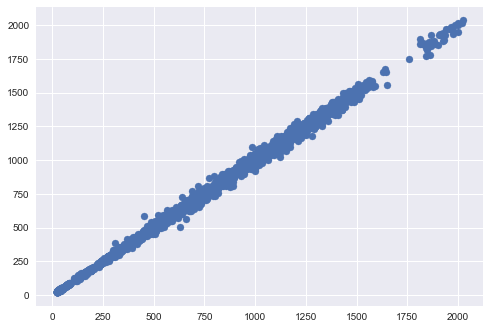

In [21]:
#Converting date
data.loc[:, 'Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [22]:
data.head(6)

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,UTIBANK,24.70,26.70,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11
1,2000-01-04,UTIBANK,26.70,27.00,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11
2,2000-01-05,UTIBANK,26.85,26.00,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11
3,2000-01-06,UTIBANK,26.30,25.80,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11
4,2000-01-07,UTIBANK,25.95,25.00,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11
5,2000-01-10,UTIBANK,24.80,25.05,26.50,25.00,25.0,25.00,25.29,64200,1.623340e+11


In [16]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 8

Text(0, 0.5, 'USD')

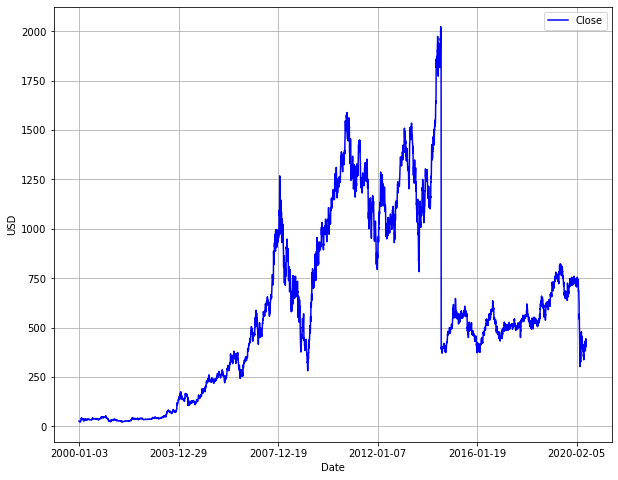

In [18]:
ax = data.plot(x='Date', y='Close', style='b-', grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("USD")